### О ЛР:

- Coding Gradient boosting

----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку (Она тут равняется 6).

**Оценка**:

***DeadLine - 28.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/MyDrive/ML/lab7

/content/gdrive/MyDrive/ML/lab7


In [3]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style="darkgrid")
filterwarnings("ignore")

In [4]:
x = load_npz("x.npz")
y = np.load("y.npy")

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 666 для воспроизводимости).

In [5]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=666
)

x_test, x_valid, y_test, y_valid = train_test_split(
    x_test, y_test, test_size=0.5, random_state=666
)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустинга [2 балла]

Необходимо дописать код в файле `boosting.py`. Уже создан шаблон класса `Boosting`, который можно модифицировать по своему усмотрению.

### Описание функций:

#### `__init__`

Конструктор класса принимает следующие параметры:

- `base_model_class` — класс базовой модели для бустинга.
- `base_model_params` — словарь гиперпараметров для базовой модели.
- `n_estimators` — количество базовых моделей для обучения.
- `learning_rate` — темп обучения, должен быть в диапазоне (0, 1].
- `subsample` — доля обучающей выборки для тренировки базовой модели (размер бутстрап-выборки относительно исходной).
- `early_stopping_rounds` — число итераций без улучшения на валидационной выборке, после которых обучение прекращается.
- `plot` — флаг для построения графика качества моделей после обучения.

#### `fit`

Метод `fit` принимает обучающую и валидационную выборки.

1. Инициализируем нулевую модель и делаем предсказания (например, все нули) для обеих выборок.
2. Обучаем `n_estimators` базовых моделей:
   - Обучаем новую базовую модель на текущих остатках.
   - Обновляем предсказания на обучающей и валидационной выборках.
   - Рассчитываем ошибки на обеих выборках с помощью `loss_fn`.
   - Проверяем условия для ранней остановки.

3. Если флаг `plot` установлен, строим график качества после обучения всех моделей.

#### `fit_new_base_model`

Метод `fit_new_base_model` принимает обучающую выборку и текущие предсказания для неё.

1. Генерируем бутстрап-выборку.
2. Обучаем базовую модель на этой выборке.
3. Оптимизируем значение гаммы.
4. Добавляем новую базовую модель и гамму в соответствующие списки (учитывая `learning_rate`).

#### `predict_proba`

Метод `predict_proba` принимает выборку для предсказания вероятностей.

1. Суммируем предсказания базовых моделей (учитывая гамму и `learning_rate`).
2. Применяем сигмоидальную функцию для получения вероятностей.

In [6]:
%load_ext autoreload

In [14]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [15]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 1.49 s, sys: 0 ns, total: 1.49 s
Wall time: 1.48 s
Train ROC-AUC 0.9888
Valid ROC-AUC 0.9467
Test ROC-AUC 0.9434


## Задание 2. Обучение градиентного бустинга [0.5 балла]

Оцените качество вашей реализации градиентного бустинга на тестовой выборке, используя базовые модели — решающие деревья с различной максимальной глубиной. Метрикой будет ROC-AUC.

**Инструкция:**
1. Перебирайте значения максимальной глубины деревьев от 1 до 30 с шагом 2.
2. Оставьте остальные параметры бустинга по умолчанию.
3. Постройте график зависимости качества на обучающей и тестовой выборке от максимальной глубины деревьев.

Training with max_depth=1
Train ROC-AUC: 0.9019, Valid ROC-AUC: 0.8997
Training with max_depth=3
Train ROC-AUC: 0.9396, Valid ROC-AUC: 0.9375
Training with max_depth=5
Train ROC-AUC: 0.9546, Valid ROC-AUC: 0.9509
Training with max_depth=7
Train ROC-AUC: 0.9652, Valid ROC-AUC: 0.9582
Training with max_depth=9
Train ROC-AUC: 0.9723, Valid ROC-AUC: 0.9567
Training with max_depth=11
Train ROC-AUC: 0.9760, Valid ROC-AUC: 0.9564
Training with max_depth=13
Train ROC-AUC: 0.9808, Valid ROC-AUC: 0.9575
Training with max_depth=15
Train ROC-AUC: 0.9834, Valid ROC-AUC: 0.9501
Training with max_depth=17
Train ROC-AUC: 0.9856, Valid ROC-AUC: 0.9520
Training with max_depth=19
Train ROC-AUC: 0.9853, Valid ROC-AUC: 0.9479
Training with max_depth=21
Train ROC-AUC: 0.9873, Valid ROC-AUC: 0.9474
Training with max_depth=23
Train ROC-AUC: 0.9881, Valid ROC-AUC: 0.9450
Training with max_depth=25
Train ROC-AUC: 0.9882, Valid ROC-AUC: 0.9426
Training with max_depth=27
Train ROC-AUC: 0.9882, Valid ROC-AUC: 0.94

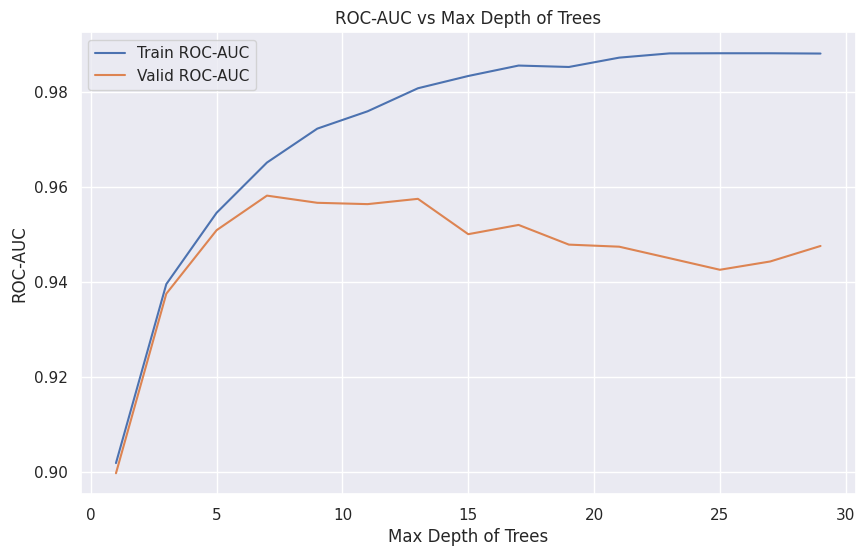

In [16]:
# Импортируем необходимые библиотеки
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

results = {
    'train_roc_auc': [],
    'valid_roc_auc': [],
    'depths': []
}

depths = range(1, 30, 2)

for depth in depths:
    print(f'Training with max_depth={depth}')

    boosting = Boosting(base_model_params={'max_depth': depth})


    boosting.fit(x_train, y_train, x_valid, y_valid)

    train_roc_auc = boosting.score(x_train, y_train)
    valid_roc_auc = boosting.score(x_valid, y_valid)

    results['train_roc_auc'].append(train_roc_auc)
    results['valid_roc_auc'].append(valid_roc_auc)
    results['depths'].append(depth)

    print(f'Train ROC-AUC: {train_roc_auc:.4f}, Valid ROC-AUC: {valid_roc_auc:.4f}')

plt.figure(figsize=(10, 6))
plt.plot(results['depths'], results['train_roc_auc'], label='Train ROC-AUC')
plt.plot(results['depths'], results['valid_roc_auc'], label='Valid ROC-AUC')
plt.xlabel('Max Depth of Trees')
plt.ylabel('ROC-AUC')
plt.title('ROC-AUC vs Max Depth of Trees')
plt.legend()
plt.grid(True)
plt.show()


**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

На графике видно, что наилучшее качество на тестовой выборке достигается на глубине 7. Дальше уже не растет, и даже хуже - начинает ухудщаться. То есть получается на такой глубине достигается наиболее поомтимальное качество, когда модель может максимально хорошо обобщать на новых данных. А дальше - модель уже переобучается

## Задание 3. Подбор гиперпараметров и поиск оптимальной модели [3 балла]

Настройте основные гиперпараметры вашей модели градиентного бустинга, используя валидационную выборку. Подберите параметры как для самого бустинга, так и для базовых моделей.

**Рекомендации:**
- Используйте библиотеки для автоматизированного подбора гиперпараметров, такие как [Hyperopt](https://github.com/hyperopt/hyperopt) или [Optuna](https://optuna.org/).
- Подберите все основные параметры, чтобы найти лучшую модель на валидационной выборке.

In [17]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 12.0 MB/s eta 0:00:00


In [18]:
import optuna
from optuna.samplers import TPESampler

def objective(trial):

    max_depth = trial.suggest_int('max_depth', 1, 30)
    n_estimators = trial.suggest_int('n_estimators', 10, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.3)
    subsample = trial.suggest_uniform('subsample', 0.3, 1.0)

    boosting = Boosting(
        base_model_params={'max_depth': max_depth},
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        subsample=subsample
    )

    # Обучаем модель
    boosting.fit(x_train, y_train, x_valid, y_valid)

    valid_roc_auc = boosting.score(x_valid, y_valid)

    return valid_roc_auc

study = optuna.create_study(direction='maximize', sampler=TPESampler())
study.optimize(objective, n_trials=50)

print(f'Best hyperparameters: {study.best_params}')
print(f'Best validation ROC-AUC: {study.best_value:.4f}')

best_params = study.best_params
boosting = Boosting(
    base_model_params={'max_depth': best_params['max_depth']},
    n_estimators=best_params['n_estimators'],
    learning_rate=best_params['learning_rate'],
    subsample=best_params['subsample']
)

boosting.fit(x_train, y_train, x_valid, y_valid)

test_roc_auc = boosting.score(x_test, y_test)
print(f'Test ROC-AUC: {test_roc_auc:.4f}')


[I 2024-05-26 17:35:28,243] A new study created in memory with name: no-name-66edf672-6530-4186-9155-6f7f1fc6761c
[I 2024-05-26 17:35:30,381] Trial 0 finished with value: 0.9568370642355749 and parameters: {'max_depth': 13, 'n_estimators': 12, 'learning_rate': 0.05964791335562133, 'subsample': 0.7787908586051697}. Best is trial 0 with value: 0.9568370642355749.
[I 2024-05-26 17:36:38,032] Trial 1 finished with value: 0.9454422749162119 and parameters: {'max_depth': 29, 'n_estimators': 185, 'learning_rate': 0.025168658488720203, 'subsample': 0.7511637827296065}. Best is trial 0 with value: 0.9568370642355749.
[I 2024-05-26 17:36:43,958] Trial 2 finished with value: 0.9576438694622695 and parameters: {'max_depth': 9, 'n_estimators': 85, 'learning_rate': 0.14094569522114564, 'subsample': 0.866940281609631}. Best is trial 2 with value: 0.9576438694622695.
[I 2024-05-26 17:36:45,493] Trial 3 finished with value: 0.9511863773453972 and parameters: {'max_depth': 2, 'n_estimators': 58, 'learni

Best hyperparameters: {'max_depth': 4, 'n_estimators': 154, 'learning_rate': 0.23195844315619885, 'subsample': 0.808503251482561}
Best validation ROC-AUC: 0.9661
Test ROC-AUC: 0.9629


## Задание 4. Интерпретация градиентного бустинга [1 балл]

Постройте калибровочную кривую для вашей лучшей модели градиентного бустинга и оцените, насколько точно модель предсказывает вероятности.

**Инструкция:**
1. Постройте калибровочную кривую для лучшей модели градиентного бустинга.
2. Постройте аналогичную кривую для логистической регрессии.
3. Сравните полученные результаты и проанализируйте, насколько хорошо каждая модель оценивает вероятности.

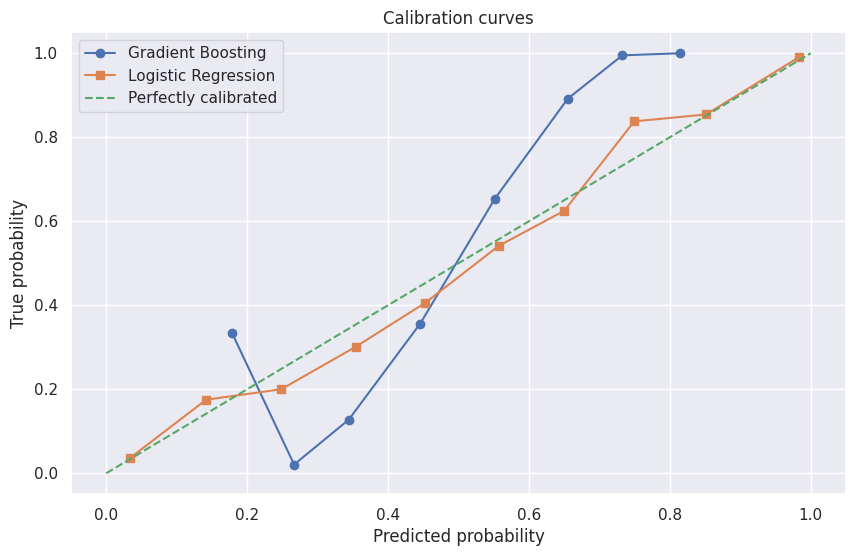

Brier Score for Gradient Boosting: 0.1234
Brier Score for Logistic Regression: 0.0724


In [22]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import brier_score_loss

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(x_train, y_train)
y_prob_log_reg = log_reg.predict_proba(x_test)[:, 1]

y_prob_boosting = boosting.predict_proba(x_test)[:, 1]

plt.figure(figsize=(10, 6))

# Калибровочная кривая для градиентного бустинга
prob_true_boosting, prob_pred_boosting = calibration_curve(y_test, y_prob_boosting, n_bins=10)
plt.plot(prob_pred_boosting, prob_true_boosting, marker='o', label='Gradient Boosting')

# Калибровочная кривая для логистической регрессии
prob_true_log_reg, prob_pred_log_reg = calibration_curve(y_test, y_prob_log_reg, n_bins=10)
plt.plot(prob_pred_log_reg, prob_true_log_reg, marker='s', label='Logistic Regression')

# Диагональ для идеальной калибровки
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')

plt.xlabel('Predicted probability')
plt.ylabel('True probability')
plt.title('Calibration curves')
plt.legend()
plt.grid(True)
plt.show()

# Оценка Brier Score для моделей
brier_boosting = brier_score_loss(y_test, y_prob_boosting)
brier_log_reg = brier_score_loss(y_test, y_prob_log_reg)

print(f'Brier Score for Gradient Boosting: {brier_boosting:.4f}')
print(f'Brier Score for Logistic Regression: {brier_log_reg:.4f}')


**Вывод**: Как видим, бустинг хуже логистической регрессии.

Теперь оценим важность признаков для градиентного бустинга.

**Задание:**
1. Поскольку базовая модель — дерево из `sklearn`, вычислите важность каждого признака для каждого дерева, используя атрибут `feature_importances_` у `DecisionTreeRegressor`.
2. Усредните значения важности по всем деревьям и нормализуйте их так, чтобы сумма была равна единице (убедитесь, что значения неотрицательны).
3. Дополните вашу реализацию бустинга, добавив метод `feature_importances_`, который будет возвращать усредненные и нормализованные важности признаков.

**Построение графиков:**
1. Постройте столбчатую диаграмму важности признаков для градиентного бустинга.
2. На соседнем графике изобразите важность признаков для логистической регрессии, используя модули весов.
3. Сравните графики и проанализируйте полученные результаты.

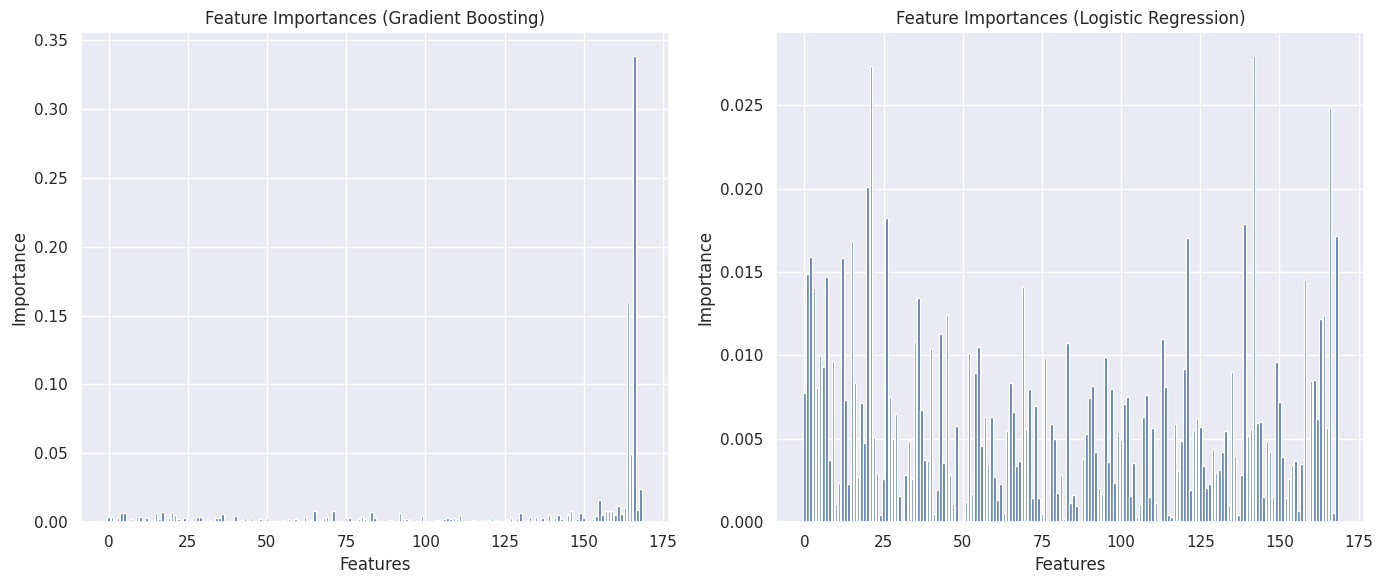

In [23]:
boosting_feature_importances = boosting.feature_importances_

log_reg_feature_importances = np.abs(log_reg.coef_[0])
log_reg_feature_importances /= log_reg_feature_importances.sum()

features = np.arange(len(boosting_feature_importances))

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.bar(features, boosting_feature_importances)
plt.title('Feature Importances (Gradient Boosting)')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.subplot(1, 2, 2)
plt.bar(features, log_reg_feature_importances)
plt.title('Feature Importances (Logistic Regression)')
plt.xlabel('Features')
plt.ylabel('Importance')

plt.tight_layout()
plt.show()


Ответ: вау, кажется бустинг юзает только малую часть признаков (с серьезностью)) а вот логистическая регрессия - большую часть. Возможно, в случае с бустингом моделька "решает" что эти признаки наиболее корелируют с целевой переменной.

Обычно избыточные признаки могут негативно влиять на качество бустинга. Попробуйте следующее:

1. **Отфильтруйте неважные признаки:** Используйте построенную диаграмму важности признаков, чтобы отобрать наиболее незначительные признаки.
2. **Обучите модель повторно:** Обучите модель на основе оставшихся признаков с теми же гиперпараметрами.
3. **Оцените качество модели:** Сравните результаты новой модели с исходной. Улучшилось ли качество после отфильтровывания незначительных признаков?

In [31]:
thresholds = [0.005, 0.01, 0.02, 0.05]
results = []

for threshold in thresholds:
    important_features = np.where(boosting_feature_importances > threshold)[0]

    x_train_filtered = x_train[:, important_features]
    x_valid_filtered = x_valid[:, important_features]
    x_test_filtered = x_test[:, important_features]

    boosting_filtered = Boosting(
        base_model_params={'max_depth': best_params['max_depth']},
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        subsample=best_params['subsample']
    )
    boosting_filtered.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)

    test_roc_auc_filtered = boosting_filtered.score(x_test_filtered, y_test)
    results.append((threshold, test_roc_auc_filtered))

for threshold, roc_auc in results:
    print(f'Threshold: {threshold}, Test ROC-AUC: {roc_auc:.4f}')

test_roc_auc_original = boosting.score(x_test, y_test)
print(f'Test ROC-AUC (Original): {test_roc_auc_original:.4f}')



Threshold: 0.005, Test ROC-AUC: 0.9600
Threshold: 0.01, Test ROC-AUC: 0.9501
Threshold: 0.02, Test ROC-AUC: 0.9456
Threshold: 0.05, Test ROC-AUC: 0.9335
Test ROC-AUC (Original): 0.9629


Даже перебрав тресхолд, чтобы определить порог какие признаки таки стоит отбрасывать, не получил улучшения, а наоборот, выкидывая их, получаю ухудшение. Видимо, даже признаки с низкой важностью вносят вклад.

## Задание 5 (бонус). Блендинговое [0.5 балла]

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [33]:
y_pred_boosting_valid = boosting.predict_proba(x_valid)[:, 1]
y_pred_boosting_test = boosting.predict_proba(x_test)[:, 1]

y_pred_log_reg_valid = log_reg.predict_proba(x_valid)[:, 1]
y_pred_log_reg_test = log_reg.predict_proba(x_test)[:, 1]

blender_train_x = np.vstack((y_pred_boosting_valid, y_pred_log_reg_valid)).T
blender_train_y = y_valid

blender = LogisticRegression(max_iter=1000)
blender.fit(blender_train_x, blender_train_y)

blender_test_x = np.vstack((y_pred_boosting_test, y_pred_log_reg_test)).T
y_pred_blender_test = blender.predict_proba(blender_test_x)[:, 1]

# Оценка качества модели-блендера на тестовых данных
roc_auc_blender = roc_auc_score(y_test, y_pred_blender_test)
print(f'Test ROC-AUC (Blender): {roc_auc_blender:.4f}')

# Сравнение с исходными моделями
roc_auc_boosting = roc_auc_score(y_test, y_pred_boosting_test)
roc_auc_log_reg = roc_auc_score(y_test, y_pred_log_reg_test)
print(f'Test ROC-AUC (Gradient Boosting): {roc_auc_boosting:.4f}')
print(f'Test ROC-AUC (Logistic Regression): {roc_auc_log_reg:.4f}')




Test ROC-AUC (Blender): 0.9641
Test ROC-AUC (Gradient Boosting): 0.9629
Test ROC-AUC (Logistic Regression): 0.9622


Вывод: да, комбинация сильных сторон обоих моделей чутка улучшила результат.

## Задание 6 (бонус). Катбустовое [0.5 балла]

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [34]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 16.1 MB/s eta 0:00:00


In [35]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [36]:
catboost_model = CatBoostClassifier(
    iterations=1000,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    verbose=100
)

catboost_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), early_stopping_rounds=100)

y_pred_catboost_test = catboost_model.predict_proba(x_test)[:, 1]

roc_auc_catboost = roc_auc_score(y_test, y_pred_catboost_test)
print(f'Test ROC-AUC (CatBoost): {roc_auc_catboost:.4f}')


0:	learn: 0.5880309	test: 0.5897084	best: 0.5897084 (0)	total: 53ms	remaining: 52.9s
100:	learn: 0.2167814	test: 0.2319435	best: 0.2319435 (100)	total: 472ms	remaining: 4.2s
200:	learn: 0.1948545	test: 0.2261625	best: 0.2258443 (191)	total: 892ms	remaining: 3.54s
300:	learn: 0.1817259	test: 0.2257945	best: 0.2254415 (217)	total: 1.31s	remaining: 3.04s
400:	learn: 0.1724097	test: 0.2258437	best: 0.2248470 (367)	total: 1.72s	remaining: 2.57s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.2248470079
bestIteration = 367

Shrink model to first 368 iterations.
Test ROC-AUC (CatBoost): 0.9678


In [39]:
y_pred_boosting_test = boosting.predict_proba(x_test)[:, 1]
roc_auc_boosting = roc_auc_score(y_test, y_pred_boosting_test)
roc_auc_blender = roc_auc_score(y_test, y_pred_blender_test)
print(f'Test ROC-AUC (Blender): {roc_auc_blender:.4f}')
print(f'Test ROC-AUC (Gradient Boosting): {roc_auc_boosting:.4f}')
print(f'Test ROC-AUC (CatBoost): {roc_auc_catboost:.4f}')



Test ROC-AUC (Blender): 0.9641
Test ROC-AUC (Gradient Boosting): 0.9629
Test ROC-AUC (CatBoost): 0.9678


In [ ]:
Ну почти)

Оставьте пожалуйста отзыв о курсе!

https://forms.gle/LajA3Xrps6u96Q5A8


Это очень важно. Благодаря обратной связи мы будем двигаться в сторону антиградиента)


Максимальная - 6.